193 193
True
0, 1.3.6.1.4.1.14519.5.2.1.6279.6001.103712152868469330544412013920.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.103712152868469330544412013920.xml


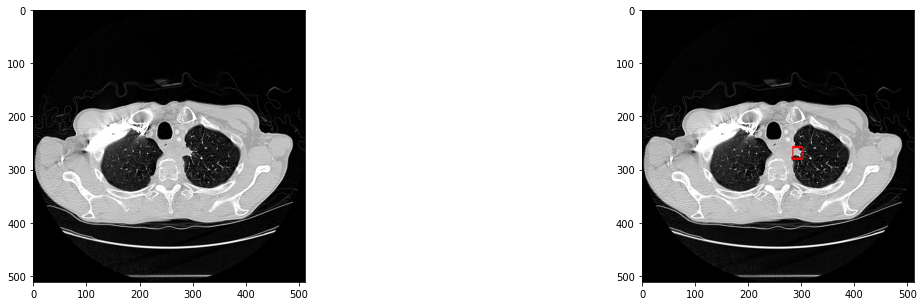

1, 1.3.6.1.4.1.14519.5.2.1.6279.6001.104944699410718419357485553936.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.104944699410718419357485553936.xml


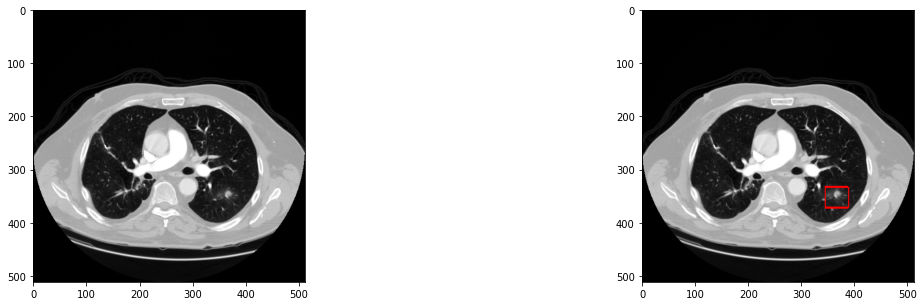

2, 1.3.6.1.4.1.14519.5.2.1.6279.6001.107560761026882791311267818029.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.107560761026882791311267818029.xml


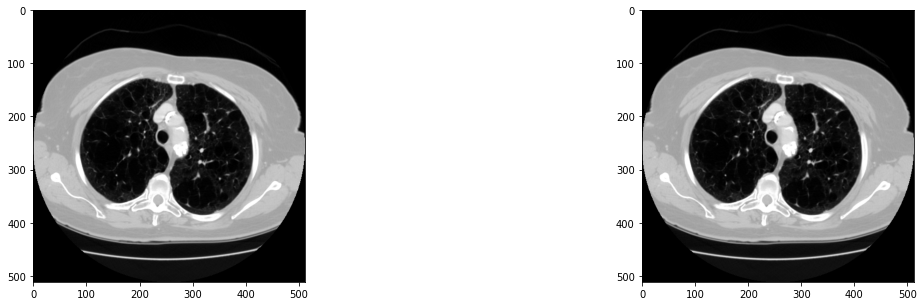

3, 1.3.6.1.4.1.14519.5.2.1.6279.6001.107807138098054517242037110026.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.107807138098054517242037110026.xml


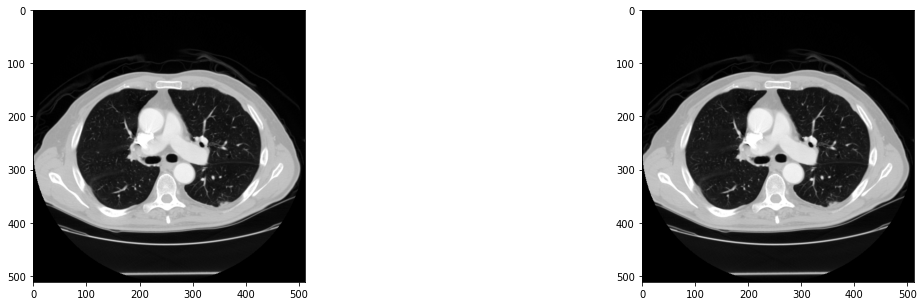

4, 1.3.6.1.4.1.14519.5.2.1.6279.6001.108202552473569799757122799054.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.108202552473569799757122799054.xml


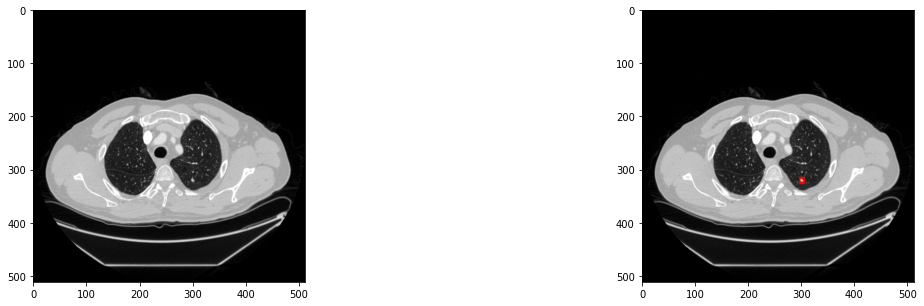

5, 1.3.6.1.4.1.14519.5.2.1.6279.6001.110206842273056092025778910231.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.110206842273056092025778910231.xml


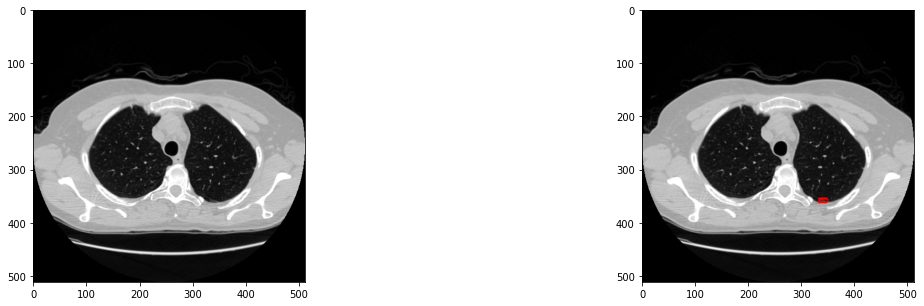

6, 1.3.6.1.4.1.14519.5.2.1.6279.6001.110383487652933113465768208719.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.110383487652933113465768208719.xml


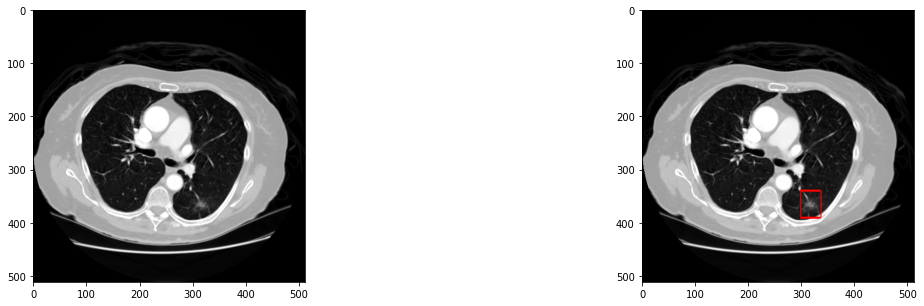

7, 1.3.6.1.4.1.14519.5.2.1.6279.6001.111752153492602660713772845414.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.111752153492602660713772845414.xml


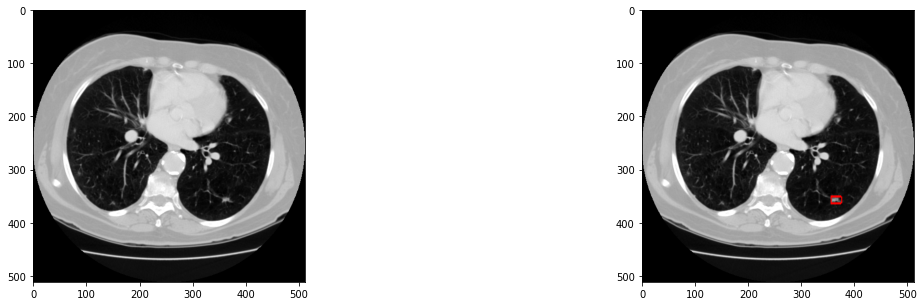

8, 1.3.6.1.4.1.14519.5.2.1.6279.6001.114572072351795480109385734381.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.114572072351795480109385734381.xml


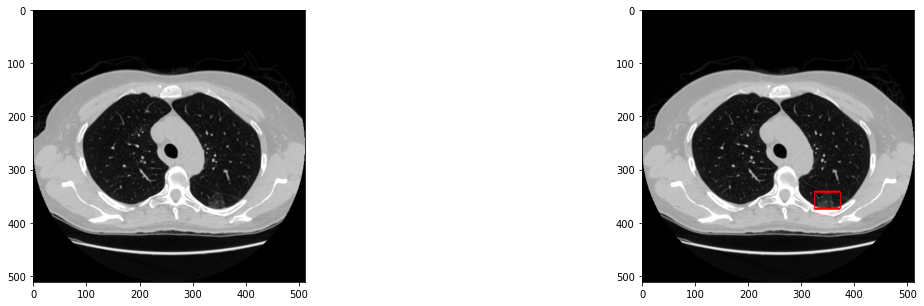

9, 1.3.6.1.4.1.14519.5.2.1.6279.6001.117180305916511820772635393344.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.117180305916511820772635393344.xml


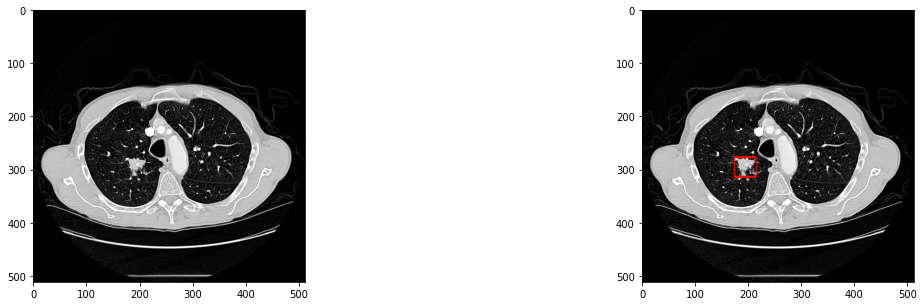

10, 1.3.6.1.4.1.14519.5.2.1.6279.6001.123761639369579795807214617853.png, 1.3.6.1.4.1.14519.5.2.1.6279.6001.123761639369579795807214617853.xml


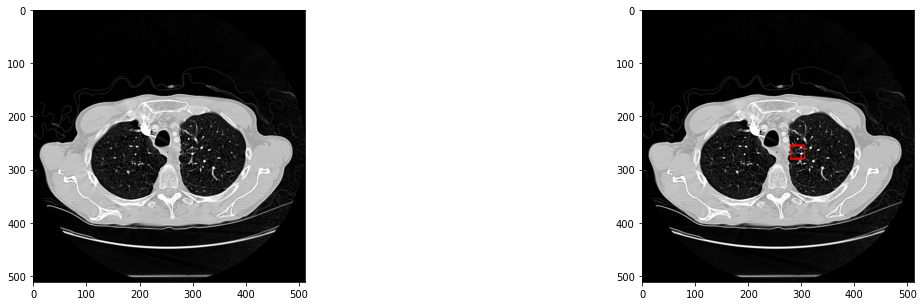

In [2]:
import re, glob
import cv2 # imageIO and processing
import matplotlib.pyplot as plt # show 

def getBoxes(annotPath,classList):
    if ".xml" in annotPath: # Pascal VOC
        xml = open(annotPath,"r").read()
        nameL = re.findall("<name>(.*)</name>",xml)
        xminL = re.findall("<xmin>(.*)</xmin>",xml)
        yminL = re.findall("<ymin>(.*)</ymin>",xml)
        xmaxL = re.findall("<xmax>(.*)</xmax>",xml)
        ymaxL = re.findall("<ymax>(.*)</ymax>",xml)
        L = []
        for name,xmin,ymin,xmax,ymax in zip(nameL,xminL,yminL,xmaxL,ymaxL):
            L.append( (classList.index(name),int(xmin),int(ymin),int(xmax),int(ymax)) )
        return L

def show(imgPath,annotPath,classList):
    img0 = cv2.imread(imgPath)[:,:,::-1]
    img  = img0.copy()
    boxes = getBoxes(annotPath,classList)
    color = [ (255,0,0), (0,255,0), (0,0,255) ]
    for cid,xmin,ymin,xmax,ymax in boxes:
        img[ymin-2:ymin+2,xmin:xmax,0] = color[cid][0]
        img[ymin-2:ymin+2,xmin:xmax,1] = color[cid][1]
        img[ymin-2:ymin+2,xmin:xmax,2] = color[cid][2]
        img[ymax-2:ymax+2,xmin:xmax,0] = color[cid][0]
        img[ymax-2:ymax+2,xmin:xmax,1] = color[cid][1]
        img[ymax-2:ymax+2,xmin:xmax,2] = color[cid][2]
        img[ymin:ymax,xmin:xmin+2,0] = color[cid][0]
        img[ymin:ymax,xmin:xmin+2,1] = color[cid][1]
        img[ymin:ymax,xmin:xmin+2,2] = color[cid][2]
        img[ymin:ymax,xmax:xmax+2,0] = color[cid][0]
        img[ymin:ymax,xmax:xmax+2,1] = color[cid][1]
        img[ymin:ymax,xmax:xmax+2,2] = color[cid][2]
    ax = plt.figure(figsize=(20,5))
    ax.set_facecolor("white")
    plt.subplot(1,2,1)
    plt.imshow(img0)
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.show()

imgPathList = sorted(glob.glob(f'temp/org_img/*.png'))
xmlPathList = sorted(glob.glob(f'temp/xml_folder/*.xml'))
print( len(imgPathList), len(xmlPathList) )
print( list(map(lambda s:s.split('/')[-1][:-4],imgPathList)) == list(map(lambda s:s.split('/')[-1][:-4],xmlPathList)) )

for i,(imgPath,xmlPath) in enumerate(zip(imgPathList,xmlPathList)):
    if i>10:
        break
    print( f"{i}, {imgPath.split('/')[-1]}, {xmlPath.split('/')[-1]}" )
    show(imgPath, xmlPath, ["nodule"])